# Problem Set # 5

### Submitted by: Riddhima Mishra

In [2]:
cd C:\\cygwin64\\home\\Riddhima Mishra\\persp-model_W18\\ProblemSets\\PS5\\data

C:\cygwin64\home\Riddhima Mishra\persp-model_W18\ProblemSets\PS5\data


In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. Multinomial Regression and Cross Validation

In [4]:
#Load data
data = pd.read_csv("strongdrink.txt")
data.isnull().sum()

#No null values

#Keeping relevant variables

data_analysis = data.drop(['ash', 'alk', 'magn', 'flav', 'nonfl_phen', 'proanth', 'hue', 'OD280rat', 'proline'], 1)

In [6]:
data_analysis.head()

,cultivar,alco,malic,tot_phen,color_int
0,1,14.23,1.71,2.80,5.64
1,1,13.20,1.78,2.65,4.38
2,1,13.16,2.36,2.80,5.68
3,1,14.37,1.95,3.85,7.80
4,1,13.24,2.59,2.80,4.32


In [7]:
# X and y are numpy arrays, not a DataFrame and Series, respectively.
X = data_analysis.ix[:, (1, 2, 3, 4)].values
y = data_analysis.ix[:, 0].values

C:\Users\Riddhima Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25,
                                                    random_state=20)

In [9]:
#running logit model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

#### a) Estimated coeffecients, error rates

In [13]:
#Estimates coeffecients

print("Estimated coeffecients", LogReg.coef_)
print("Coeffecient for the intercept", LogReg.intercept_)


print(classification_report(y_test, y_pred))

#Error rates

MSE_vs = ((y_test - y_pred) ** 2).sum() / y_pred.shape[0]
print('Validation set MSE = ', MSE_vs)



Estimated coeffecients [[-0.14627245 -0.48477655  1.51308262  0.13903482]
 [ 0.3565457  -0.34661319  0.64339283 -1.61990007]
 [-0.23172523  0.95844737 -2.68156609  1.00492579]]
Coeffecient for the intercept [-1.94941251  1.10964888  0.03887469]
             precision    recall  f1-score   support

          1       0.92      0.85      0.88        13
          2       0.95      0.95      0.95        21
          3       0.91      1.00      0.95        10

avg / total       0.93      0.93      0.93        44

Validation set MSE =  0.136363636364


Model is best at predicting j = 2

Plotting a graph to check if the best predicted category has the most observations as well

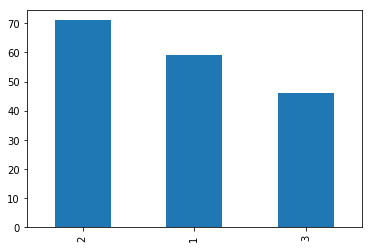

In [14]:
data_analysis['cultivar'].value_counts().plot(kind='bar')
plt.show()

Yes, best predicted category, has also the most observations

#### b) Leave one out cross validation

In [18]:
from sklearn.model_selection import LeaveOneOut, KFold


Xvars = data_analysis.ix[:, (1, 2, 3, 4)].values
yvals = data_analysis.ix[:, 0].values

N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec[test_index] = (y_test - y_pred) ** 2
    print('MSE for test set', test_index, ' is', MSE_vec[test_index])

MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)

MSE for test set [0]  is [ 0.]
MSE for test set [1]  is [ 0.]
MSE for test set [2]  is [ 0.]
MSE for test set [3]  is [ 0.]
MSE for test set [4]  is [ 0.]
MSE for test set [5]  is [ 0.]
MSE for test set [6]  is [ 0.]
MSE for test set [7]  is [ 0.]
MSE for test set [8]  is [ 0.]
MSE for test set [9]  is [ 0.]
MSE for test set [10]  is [ 0.]
MSE for test set [11]  is [ 1.]
MSE for test set [12]  is [ 0.]
MSE for test set [13]  is [ 0.]
MSE for test set [14]  is [ 0.]
MSE for test set [15]  is [ 0.]
MSE for test set [16]  is [ 0.]
MSE for test set [17]  is [ 0.]
MSE for test set [18]  is [ 0.]
MSE for test set [19]  is [ 0.]
MSE for test set [20]  is [ 0.]
MSE for test set [21]  is [ 4.]
MSE for test set [22]  is [ 1.]
MSE for test set [23]  is [ 1.]
MSE for test set [24]  is [ 1.]
MSE for test set [25]  is [ 1.]
MSE for test set [26]  is [ 0.]
MSE for test set [27]  is [ 1.]
MSE for test set [28]  is [ 0.]
MSE for test set [29]  is [ 0.]
MSE for test set [30]  is [ 0.]
MSE for test set [

#### c. k-cross validation

In [19]:
k = 4
kf = KFold(n_splits=3, random_state=10, shuffle=True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)


k index= 0
MSE for test set 0  is 0.28813559322
k index= 1
MSE for test set 1  is 0.271186440678
k index= 2
MSE for test set 2  is 0.051724137931
test estimate MSE k-fold= 0.152761542957 test estimate MSE standard err= 0.128350337072


## 2. Splines and interpolation

##### a) scatterplot 

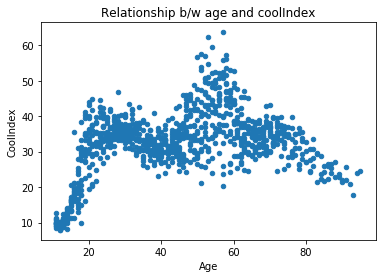

In [46]:
data2 = pd.read_csv("CoolIndex.txt", header =None, names = ['Age', 'CoolIndex'])

data2.plot(x='Age', y ='CoolIndex', kind='scatter')
plt.title("Relationship b/w age and coolIndex")
plt.show()

##### b) Ordinary Least Square step 

In [51]:
age = data2['Age']

data2['age1'] = (( age >= 11) & ( age <=22)).astype(int)
data2['age2'] = (( age >= 22) & ( age <=40)).astype(int)
data2['age3'] = (( age >= 40) & ( age <=59)).astype(int)
data2['age4'] = (( age >= 59) & ( age <=77)).astype(int)
data2['age5'] = (( age >= 77) & ( age <=95)).astype(int)


reg2 = sm.OLS(endog=data2['CoolIndex'], exog=data2[['age1', 'age2', 'age3', 'age4', 'age5']], missing='drop')
reg2_results = reg2.fit()
print(reg2_results.summary())

                            OLS Regression Results                            
Dep. Variable:              CoolIndex   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     2159.
Date:                Mon, 19 Feb 2018   Prob (F-statistic):               0.00
Time:                        08:42:51   Log-Likelihood:                -3528.0
No. Observations:                 956   AIC:                             7066.
Df Residuals:                     951   BIC:                             7090.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age1          18.4260      0.747     24.661      0.0

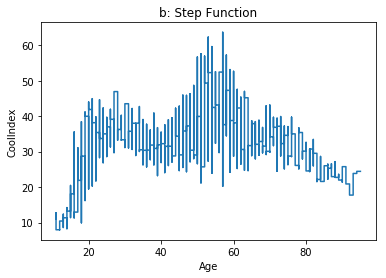

In [61]:
x= age
y = data2['CoolIndex']

plt.step(x, y, data=None, where='pre')
plt.xlabel('Age')
plt.ylabel('CoolIndex')
plt.title("b: Step Function")

plt.show()

##### Predicted values

In [22]:
df_test= pd.DataFrame({
        "age1":[0],
        "age2": [0],
        "age3": [0],
        "age4":[1],
        "age5":[0]})

reg2_results.predict(df_test)

0    32.054388
dtype: float64

##### c) Linear spline

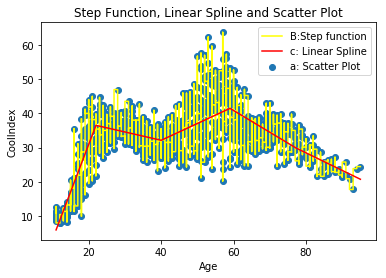

In [67]:
import scipy.interpolate as intpl
knots = [22, 40, 59, 77]


age= data2['Age']
index = data2['CoolIndex']



spl = intpl.LSQUnivariateSpline(age.values, index.values, knots, k=1)

age_vec = np.linspace(age.values.min(), age.values.max(), 1000)
#scatter plot
plt.scatter(age, index, label = "a: Scatter Plot")
plt.xlabel('Age')
plt.ylabel('CoolIndex')

# Step plot
x= age
y = data2['CoolIndex']
plt.step(x, y, data=None, where='pre', color='yellow', label = "B:Step function")
plt.legend(loc='upper right')

#Linear Spline
plt.plot(age_vec, spl(age_vec), 'r-', label = "c: Linear Spline")
plt.legend(loc='upper right')
plt.title("Step Function, Linear Spline and Scatter Plot")
plt.show()

##### Predicted values

In [24]:
ages_for_predict = np.array(73)
predicted_index = spl(ages_for_predict)
print('Ages=', ages_for_predict)
print('Predicted Cool Index=', predicted_index)

Ages= 73
Predicted Cool Index= 32.536832389143306


##### d) Cubic spline

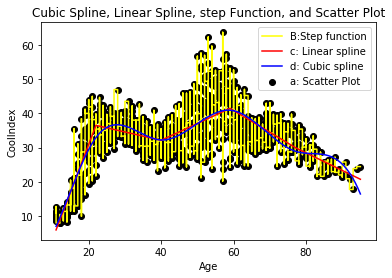

In [68]:
spl_cubic = intpl.LSQUnivariateSpline(age.values, index.values, knots, k=3)


age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

#Scatter Plot

plt.scatter(age, index, color = 'black', label = "a: Scatter Plot")
plt.xlabel('Age')
plt.ylabel('CoolIndex')

# Step plot
x= age
y = data2['CoolIndex']
plt.step(x, y, data=None, where='pre', color='yellow', label = "B:Step function")
plt.legend(loc='upper right')

#Linear Spline
plt.plot(age_vec, spl(age_vec), 'r-', color= 'red', label = "c: Linear spline")
plt.legend(loc='upper right')

#Cubic Spline

plt.plot(age_vec, spl_cubic(age_vec), 'r-', color = 'blue', label ="d: Cubic spline")
plt.legend(loc='upper right')
plt.title("Cubic Spline, Linear Spline, step Function, and Scatter Plot")
plt.show()

##### Predicted values

In [26]:
ages_for_predict = np.array(73)
predicted_index = spl_cubic(ages_for_predict)
print('Ages=', ages_for_predict)
print('Predicted Cool Index=', predicted_index)

Ages= 73
Predicted Cool Index= 31.262429389257864
